# Default Risk Rating with Machine Learning

## Applied Statistics


A financial company asks you to perform a default risk rating. They have data about historic customer  behaviour at  the  time  of  the  loan  application. Before  they  award  new  loans, they predict the default risk based on this information. You  get  access  to  detailed  data  about 250,000 loans.  The  data  contains socio-economic characteristics,  employment  information,  and  wealth  status.  Furthermore,  you  observe whether a loan of the customer defaulted in the past or not. Your task as data analyst is to predict the default risk. For this purpose, you can use classical estimation  methods  and  more  advanced unsupervised  machine  learning  methods. The ultimate goal is to develop a tool, that enables the financial company to measure default risk in an easy interpretable way.


DATA :

- Microdata from internal records of the financial company.

- The data comprises information on past defaults, income, age, experience, marital status, property, employment, and residency.

- Additional data about  the  business  cycle  can  be  merged  based  on  regional information.



INDICATIVE BIBLIOGRAPHY

G.James, T.Hastie, D.Witten, R.J.Tibshirani (2021): An Introduction to Statistical Learning: With Applications in R, 2nd edition, Springer, https://www.statlearning.com/ 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open(r"C:\Users\Antoine\Downloads\description.txt") as f:
    contents = f.read()
    print(contents)

CONTEXT
An organization wants to predict who possible defaulters are for the consumer loans product. 
They have data about historic customer behavior based on what they have observed. 
Hence when they acquire new customers they want to predict who is riskier and who is not.

CONTENT
All values were provided at the time of the loan application.

Column			Description					Type
income			Income of the user				int
age			Age of the user					int
experience		Professional experience of the user in years	int
profession		Profession					string
married			Whether married or single			string
house_ownership		Owned or rented or neither			string
car_ownership		Does the person own a car			string
risk_flag		Defaulted on a loan				string
currentjobyears		Years of experience in the current job		int
currenthouseyears	Number of years in the current residence	int
city			City of residence				string
state			State of residence				string

The risk_flag indicates whether there has been a default in the past or not.


In [3]:
df=pd.read_csv(r"C:\Users\Antoine\Downloads\default data.csv")
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Pour analyser numériquement le jeu de données, il serait sans doute judicieux de transformer les réponses de type oui/non en variables binaires 1/0.

In [6]:
df.sample(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
129911,129912,6448514,30,6,single,rented,no,Magistrate,Bihar_Sharif,Bihar,6,10,0
179575,179576,4515909,22,12,single,rented,yes,Chef,Sonipat,Haryana,7,13,0
189,190,9899664,45,5,single,rented,no,Software_Developer,Bidhannagar,West_Bengal,5,10,0
29361,29362,6461341,24,18,single,rented,no,Firefighter,Mehsana,Gujarat,9,11,0
51471,51472,6913338,61,16,single,rented,yes,Consultant,Satara,Maharashtra,11,14,1
234843,234844,9315037,63,10,single,rented,no,Petroleum_Engineer,Thiruvananthapuram,Kerala,5,13,0
133612,133613,1596742,79,15,single,norent_noown,no,Software_Developer,Buxar[37],Bihar,14,14,0
161881,161882,5694236,39,2,married,rented,yes,Economist,Anantapuram[24],Andhra_Pradesh,2,10,0
102003,102004,389819,29,3,married,rented,no,Drafter,Rampur,Uttar_Pradesh,3,14,0
182852,182853,8189154,62,13,single,rented,yes,Army_officer,Bally,West_Bengal,12,12,0


### Analysis of each variable separately

In [7]:
df["Married/Single"].value_counts()
# 89.8% single people (or 10.2% of married people)

single     226272
married     25728
Name: Married/Single, dtype: int64

In [8]:
df["House_Ownership"].value_counts()
# 92% of clients are tenants (ie rent their house)
# 5.1% of clients are homeowners
# 2.9% are neither tenants nor owners

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [9]:
df["Car_Ownership"].value_counts()
#69.8% of people in the dataset do not own a car (30.1% of car owners)

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

In [10]:
df["Age"].value_counts()
#each age represents between 1.3% and 2.1% of the sample studied

27    5197
66    5092
48    4967
33    4921
41    4827
45    4806
54    4785
68    4772
35    4643
50    4624
69    4617
76    4585
55    4563
25    4543
72    4533
79    4505
60    4504
59    4498
53    4490
47    4483
30    4468
78    4455
22    4430
34    4414
57    4394
58    4368
56    4344
24    4326
23    4322
62    4311
31    4257
70    4251
61    4235
40    4233
43    4206
21    4205
49    4203
26    4156
37    4153
71    4150
42    4134
64    4132
29    4109
67    3995
65    3969
74    3954
63    3942
77    3916
28    3901
32    3834
75    3829
39    3800
38    3793
46    3627
44    3622
73    3569
36    3444
51    3397
52    3197
Name: Age, dtype: int64

In [11]:
df["Profession"].value_counts()
#df["Profession"].nunique()
# 51 different occupations in the survey data
# Relatively "well distributed": between 1.61% and 2.36% for each profession

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [12]:
df["CITY"].value_counts()
# 317 different cities (in India)

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [13]:
df["STATE"].value_counts()
#df["STATE"].nunique()
# 29 different states in the dataset (corresponding to the total number of states in India)
# Less well "distributed": between 0.24% and 11.3%.
# but relatively consistent with the population of each Indian state

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

In [14]:
df["Risk_Flag"].value_counts()
# Of the 252,000 clients in the data, 30996 have a risk flag (12.3% of the sample)

0    221004
1     30996
Name: Risk_Flag, dtype: int64

### Transformation of "binary" variables

In [15]:
# We will create Boolean variables to replace the strings.
df.replace({'Married/Single': {'married': True, 'single': False}},inplace=True)
df.replace({'Car_Ownership': {'yes': True, 'no': False}},inplace=True)
df.replace({'House_Ownership': {'rented': -1, 'owned': 1, 'norent_noown': 0 }},inplace=True)


In [16]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,False,-1,False,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,False,-1,False,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,True,-1,False,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,False,-1,True,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,False,-1,False,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,False,-1,False,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,False,-1,False,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,False,-1,False,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,False,-1,False,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [17]:
df1=df.groupby(["Risk_Flag"]).mean()
#df2=df.groupby(["Risk_Flag"]).median()
#no great difference
df1

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
Risk_Flag,,,,,,,,,
0,125124.526579,5.000449e+06,50.093442,10.162042,0.104487,-0.864324,0.305718,6.357016,12.000086
1,132246.261711,4.973359e+06,48.960350,9.531101,0.085043,-0.902084,0.272132,6.168893,11.981449


In [18]:
df3=df.groupby("Age").mean()
df3

,Id,Income,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Age,,,,,,,,,
21,127551.418549,4.911909e+06,9.416409,0.118193,-0.875862,0.319144,6.251605,12.103448,0.142212
22,125156.439503,5.153360e+06,9.712641,0.077201,-0.936117,0.250113,5.965914,12.064560,0.173815
23,125898.895882,4.896977e+06,10.073808,0.097871,-0.886858,0.253586,6.349375,12.131421,0.124017
24,127155.715442,5.250239e+06,9.872631,0.099861,-0.869394,0.333102,6.424873,12.233010,0.145862
25,125600.643628,5.150476e+06,9.810698,0.104116,-0.809377,0.281532,6.294299,12.004843,0.128549
26,126922.409047,5.385543e+06,9.807988,0.119105,-0.893648,0.302454,6.041145,12.097209,0.173003
27,122674.205696,4.870938e+06,10.747739,0.066384,-0.849144,0.224553,6.797191,11.915336,0.138541
28,127381.835427,4.880282e+06,9.384517,0.085619,-0.927711,0.295053,6.347860,12.085875,0.154319
29,128063.556096,4.902942e+06,9.782429,0.132149,-0.913604,0.294962,6.216354,12.122171,0.138477


In [19]:

# Declaring the cm variable by the color palette from seaborn
cm = sns.color_palette("coolwarm", as_cmap=True)
 
# Visualizing the DataFrame with set precision
#print("\nModified Stlying DataFrame:")
df3.style.background_gradient(cmap=cm).set_precision(3)

C:\Users\Antoine\AppData\Local\Temp/ipykernel_20948/3281564260.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df3.style.background_gradient(cmap=cm).set_precision(3)


,Id,Income,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Age,,,,,,,,,
21,127551.419,4911909.048,9.416,0.118,-0.876,0.319,6.252,12.103,0.142
22,125156.440,5153359.971,9.713,0.077,-0.936,0.250,5.966,12.065,0.174
23,125898.896,4896977.184,10.074,0.098,-0.887,0.254,6.349,12.131,0.124
24,127155.715,5250239.386,9.873,0.100,-0.869,0.333,6.425,12.233,0.146
25,125600.644,5150476.295,9.811,0.104,-0.809,0.282,6.294,12.005,0.129
26,126922.409,5385542.812,9.808,0.119,-0.894,0.302,6.041,12.097,0.173
27,122674.206,4870938.180,10.748,0.066,-0.849,0.225,6.797,11.915,0.139
28,127381.835,4880282.428,9.385,0.086,-0.928,0.295,6.348,12.086,0.154
29,128063.556,4902941.822,9.782,0.132,-0.914,0.295,6.216,12.122,0.138


In [20]:
df4=df.groupby("Experience").mean()
df4.style.background_gradient(cmap=cm).set_precision(3)

C:\Users\Antoine\AppData\Local\Temp/ipykernel_20948/2842534509.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df4.style.background_gradient(cmap=cm).set_precision(3)


,Id,Income,Age,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Experience,,,,,,,,,
0,127906.175,5005592.739,49.865,0.098,-0.886,0.304,0.000,12.039,0.143
1,127128.932,4849856.534,49.639,0.108,-0.919,0.286,1.000,11.882,0.156
2,126725.263,5070526.581,49.659,0.090,-0.850,0.317,2.000,11.873,0.170
3,126345.281,5027426.537,49.802,0.118,-0.848,0.286,3.000,11.973,0.131
4,125719.715,5039215.649,50.915,0.105,-0.867,0.279,3.922,12.022,0.123
5,125869.395,4928933.827,49.269,0.085,-0.863,0.286,4.756,12.025,0.126
6,124353.609,5000770.845,51.003,0.106,-0.866,0.326,5.534,11.883,0.118
7,127837.878,4794962.154,49.756,0.113,-0.909,0.286,6.241,11.964,0.125
8,127472.244,4810272.572,51.388,0.090,-0.899,0.309,6.693,12.061,0.118


In [21]:
df5=df.groupby("Married/Single").mean()
df5.style.background_gradient(cmap=cm).set_precision(3)

C:\Users\Antoine\AppData\Local\Temp/ipykernel_20948/728344910.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df5.style.background_gradient(cmap=cm).set_precision(3)


,Id,Income,Age,Experience,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Married/Single,,,,,,,,,
False,126028.308,4999719.940,49.923,10.081,-0.865,0.302,6.339,11.994,0.125
True,125755.937,4974221.445,50.223,10.116,-0.905,0.300,6.288,12.029,0.102


In [22]:
df6=df.groupby("House_Ownership").mean()
df6.style.background_gradient(cmap=cm).set_precision(4)

C:\Users\Antoine\AppData\Local\Temp/ipykernel_20948/710041970.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df6.style.background_gradient(cmap=cm).set_precision(4)


,Id,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
House_Ownership,,,,,,,,,
-1,125942.8550,5006940.5024,49.8798,10.0642,0.1044,0.3013,6.3230,11.9934,0.1256
0,126722.2287,4664033.0707,49.8607,10.0839,0.0828,0.3014,6.4748,11.9649,0.0995
1,126633.9460,5005999.1843,51.3389,10.4481,0.0715,0.3062,6.4501,12.0944,0.0898


In [23]:
df7=df.groupby("Car_Ownership").mean()
df7.style.background_gradient(cmap=cm).set_precision(4)

C:\Users\Antoine\AppData\Local\Temp/ipykernel_20948/778369809.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df7.style.background_gradient(cmap=cm).set_precision(4)


,Id,Income,Age,Experience,Married/Single,House_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Car_Ownership,,,,,,,,,
False,126206.6954,4989422.3699,49.8487,10.0548,0.1023,-0.8696,6.3073,11.9976,0.1282
True,125522.9949,5014935.0338,50.1980,10.1531,0.1015,-0.8674,6.3955,11.9983,0.1110


In [24]:
df8=df.groupby("Profession").mean()
df8[["Income",'Risk_Flag']].style.background_gradient(cmap=cm).set_precision(3)

C:\Users\Antoine\AppData\Local\Temp/ipykernel_20948/1532280814.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df8[["Income",'Risk_Flag']].style.background_gradient(cmap=cm).set_precision(3)


,Income,Risk_Flag
Profession,,
Air_traffic_controller,4958421.709,0.135
Analyst,4894181.209,0.121
Architect,5004078.749,0.131
Army_officer,5094472.726,0.152
Artist,5164765.182,0.123
Aviator,5074103.520,0.135
Biomedical_Engineer,4982527.557,0.128
Chartered_Accountant,5002232.424,0.154
Chef,4839915.140,0.121


In [25]:
df9=df.groupby("CITY").mean()
df9.style.background_gradient(cmap=cm).set_precision(3)

C:\Users\Antoine\AppData\Local\Temp/ipykernel_20948/3435945837.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df9.style.background_gradient(cmap=cm).set_precision(3)


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
CITY,,,,,,,,,,
Adoni,125214.353,5216982.993,55.353,10.879,0.091,-0.987,0.262,6.383,12.112,0.108
Agartala,128379.905,4970558.522,50.298,9.886,0.158,-0.775,0.278,7.124,11.998,0.168
Agra,125236.485,4106463.668,47.746,12.277,0.087,-0.983,0.375,7.138,11.919,0.080
Ahmedabad,127621.018,5522913.159,54.704,9.453,0.022,-0.867,0.314,5.575,11.764,0.205
Ahmednagar,130379.350,4954053.414,54.636,9.412,0.065,-0.812,0.383,5.916,11.707,0.059
Aizawl,124631.219,5053508.776,44.966,8.750,0.183,-0.899,0.292,5.650,11.545,0.111
Ajmer,125774.160,5435289.977,44.432,9.967,0.148,-0.936,0.328,7.183,12.293,0.139
Akola,129013.003,4941470.099,55.327,9.924,0.111,-0.797,0.223,7.379,11.742,0.089
Alappuzha,127070.342,4338402.660,48.263,10.160,0.112,-0.977,0.384,7.047,11.657,0.131


In [26]:
df10=df.groupby("STATE").mean()
df10.style.background_gradient(cmap=cm).set_precision(3)

C:\Users\Antoine\AppData\Local\Temp/ipykernel_20948/1097201754.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df10.style.background_gradient(cmap=cm).set_precision(3)


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
STATE,,,,,,,,,,
Andhra_Pradesh,125942.073,5090490.378,49.743,10.048,0.118,-0.886,0.289,6.213,11.940,0.116
Assam,123982.402,4841613.137,51.445,9.884,0.074,-0.918,0.299,6.142,11.938,0.132
Bihar,125863.851,5056194.104,49.765,10.250,0.098,-0.885,0.276,6.499,11.999,0.131
Chandigarh,129114.825,4222786.059,50.123,10.976,0.181,-0.800,0.282,5.776,12.398,0.093
Chhattisgarh,126579.287,5053377.925,49.320,9.980,0.094,-0.856,0.312,6.087,12.114,0.133
Delhi,126000.470,5048277.879,50.654,9.798,0.085,-0.809,0.275,6.363,11.951,0.105
Gujarat,124932.587,4998497.318,50.158,10.266,0.117,-0.854,0.310,6.422,11.993,0.118
Haryana,127948.551,4879293.711,50.565,10.406,0.111,-0.870,0.262,6.254,12.176,0.124
Himachal_Pradesh,124025.508,4237701.753,46.024,11.520,0.102,-0.888,0.256,6.631,12.372,0.133


<AxesSubplot:>

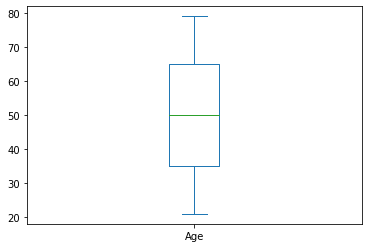

In [27]:

df["Age"].plot.box()

In [28]:
print(df.Income.quantile(0.1))
np.array(df.Income.quantile(np.linspace(.1, 1, 9, 0)))

1028915.0


array([1028915. , 2010564. , 2974371. , 3983449. , 5000694.5, 5997509. ,
       6975092. , 7957694. , 8998014. ])

In [29]:
# New variables will be created for the deciles of the relevant variables
df.Income.rank(pct = True)

0         0.127139
1         0.760984
2         0.401139
3         0.626071
4         0.575962
            ...   
251995    0.817413
251996    0.287238
251997    0.454591
251998    0.651188
251999    0.906452
Name: Income, Length: 252000, dtype: float64